In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [2]:
# load the data
mnist = tf.keras.datasets.mnist

In [3]:
# split and norm the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4865 - accuracy: 0.8568 - val_loss: 0.1468 - val_accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.1573 - accuracy: 0.9554 - val_loss: 0.1031 - val_accuracy: 0.9684
Epoch 3/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.1101 - accuracy: 0.9669 - val_loss: 0.0852 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.0875 - accuracy: 0.9727 - val_loss: 0.0807 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 2s 941us/step - loss: 0.0754 - accuracy: 0.9764 - val_loss: 0.0757 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.0781 - val_accuracy: 0.9757
Epoch 7/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.0586 - accuracy: 0.9813 - val_loss: 0.0729 - v

In [7]:
r.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fbdf2653f40>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.2993033528327942,
   0.14459046721458435,
   0.10641218721866608,
   0.08742044866085052,
   0.07554941624403,
   0.06628360599279404,
   0.057901158928871155,
   0.053226642310619354,
   0.047045350074768066,
   0.04470418393611908],
  'accuracy': [0.9125833511352539,
   0.9571499824523926,
   0.9678500294685364,
   0.9729833602905273,
   0.9763666391372681,
   0.9788166880607605,
   0.9814333319664001,
   0.9826666712760925,
   0.9848499894142151,
   0.9848833084106445],
  'val_loss': [0.14681242406368256,
   0.10312430560588837,
   0.08521373569965363,
   0.08071013540029526,
   0.07566007226705551,
   0.07814060896635056,
   0.07293223589658737,
   0.0710233673453331,
   0.07170040905475616,
   0.07073323428630829],
  'val_accuracy': [0.9542999863624573,
   0.9684000015258789,
   0.97409999370

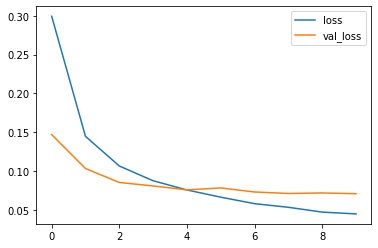

In [8]:
# plot the result
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

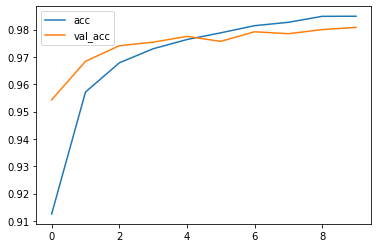

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 655us/step - loss: 0.0707 - accuracy: 0.9808
[0.07073323428630829, 0.9807999730110168]


Confusion matrix, without normalization
[[ 972    0    2    1    1    0    1    2    1    0]
 [   0 1122    2    1    0    0    2    1    7    0]
 [   3    0 1015    1    3    0    2    3    4    1]
 [   0    0    3  994    0    4    0    6    2    1]
 [   2    0    1    0  968    0    2    1    2    6]
 [   2    1    0    7    1  873    2    1    4    1]
 [   5    1    0    0    6    6  937    0    3    0]
 [   1    3   13    3    0    0    0 1004    2    2]
 [   2    0    2    4    5    0    0    6  953    2]
 [   2    3    0    5   11    7    0    7    4  970]]


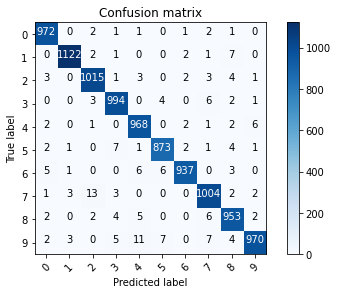

In [20]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, x_train = x_train / 255.0, x_test = x_test / 255.0,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
  
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
  
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
  
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

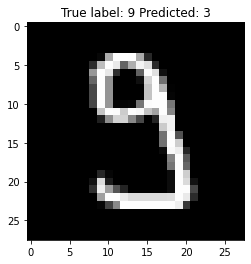

In [21]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));